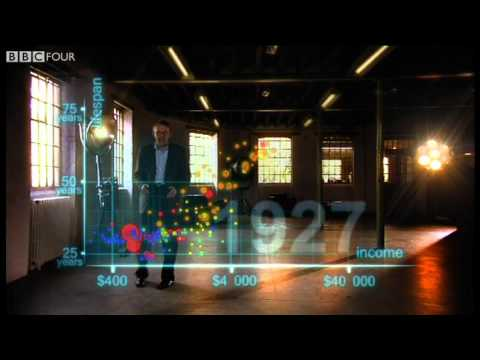

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("jbkSRLYSojo", width=800, height=600)

1. Load all the datasets in the data/gapminder directory, indexing them by Country.
2. Create a function that receives a year as an integer and returns a new dataframe with Country as the index and the columns Fertility, Life expectancy, Population and Group.
3. Create a Plotly FigureWidget and visualize a scatter plot of Life expectancy vs Fertility, using the Population as bubble size (you will need some scaling) and coloring by Group. Hint: it will be easier to do as many scatters as regions
4. Decorate the figure with proper X and Y axis labels, a title, a big text showing the year, and a legend (if not present). Note: The legend might not show the colors
5. Create a function update_year that receives a year as an integer and updates the data of the existing figure with the values from the selected year. Note: The update might not be very efficient
6. Create an horizontal slider that ranges from the minimum to the maximum year
7. Bind the update_year function to changes in the horizontal slider and use it to interactively change the plot

In [20]:
#importing all relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [21]:
!pip install plotly

In [22]:
from plotly import graph_objs as go

In [23]:
import warnings
warnings.filterwarnings("ignore")

1. Load all the datasets in the `data/gapminder` directory, indexing them by `Country`.

In [24]:
fertility = pd.read_csv(
    '/Users/allison/Desktop/BTSMBDS/Data Science Foundations/bts-mbds-data-science-foundations/sessions/data/gapminder/fertility.csv',
    index_col='Country')

In [25]:
fertility.head()

,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,5.141,4.900
Albania,5.711,5.594,5.483,5.376,5.268,5.160,5.050,4.933,4.809,4.677,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,1.760,1.771
Algeria,7.653,7.655,7.657,7.658,7.657,7.652,7.641,7.622,7.591,7.548,...,2.448,2.507,2.580,2.656,2.725,2.781,2.817,2.829,2.820,2.795
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
life = pd.read_csv(
    '/Users/allison/Desktop/BTSMBDS/Data Science Foundations/bts-mbds-data-science-foundations/sessions/data/gapminder/life_expectancy.csv',
    index_col='Country')

In [27]:
life.head()

,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.639,34.152,34.662,35.170,35.674,36.172,36.663,37.143,37.614,38.075,...,56.583,57.071,57.582,58.102,58.618,59.124,59.612,60.079,60.524,60.947
Albania,65.475,65.863,66.122,66.316,66.500,66.702,66.948,67.251,67.595,67.966,...,75.725,75.949,76.124,76.278,76.433,76.598,76.780,76.979,77.185,77.392
Algeria,47.953,48.389,48.806,49.205,49.592,49.976,50.366,50.767,51.195,51.670,...,69.682,69.854,70.020,70.180,70.332,70.477,70.615,70.747,70.874,71.000
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
population = pd.read_csv(
    '/Users/allison/Desktop/BTSMBDS/Data Science Foundations/bts-mbds-data-science-foundations/sessions/data/gapminder/population.csv',
    index_col='Country')

In [29]:
population.head()

,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,10474903.0,10697983.0,10927724.0,11163656.0,11411022.0,11676990.0,11964906.0,12273101.0,12593688.0,12915499.0,...,26693486.0,27614718.0,28420974.0,29145841.0,29839994.0,30577756.0,31411743.0,32358260.0,33397058.0,34499915.0
Albania,1817098.0,1869942.0,1922993.0,1976140.0,2029314.0,2082474.0,2135599.0,2188650.0,2241623.0,2294578.0,...,3124861.0,3141800.0,3156607.0,3169665.0,3181397.0,3192723.0,3204284.0,3215988.0,3227373.0,3238316.0
Algeria,11654905.0,11923002.0,12229853.0,12572629.0,12945462.0,13338918.0,13746185.0,14165889.0,14600659.0,15052371.0,...,32396048.0,32888449.0,33391954.0,33906605.0,34428028.0,34950168.0,35468208.0,35980193.0,36485828.0,36983924.0
American Samoa,22672.0,23480.0,24283.0,25087.0,25869.0,26608.0,27288.0,27907.0,28470.0,28983.0,...,61871.0,62962.0,64045.0,65130.0,66217.0,67312.0,68420.0,69543.0,70680.0,71834.0
Andorra,17438.0,18529.0,19640.0,20772.0,21931.0,23127.0,24364.0,25656.0,26997.0,28357.0,...,75292.0,77888.0,79874.0,81390.0,82577.0,83677.0,84864.0,86165.0,87518.0,88909.0


In [30]:
regions = pd.read_csv(
    '/Users/allison/Desktop/BTSMBDS/Data Science Foundations/bts-mbds-data-science-foundations/sessions/data/gapminder/regions.csv',
    index_col='Country')

In [31]:
regions.head()

,Group,ID
Country,,
Angola,Sub-Saharan Africa,AO
Benin,Sub-Saharan Africa,BJ
Botswana,Sub-Saharan Africa,BW
Burkina Faso,Sub-Saharan Africa,BF
Burundi,Sub-Saharan Africa,BI


2. Create a function that receives a `year` _as an integer_ and returns a new dataframe with `Country` as the index and the columns `Fertility`, `Life expectancy`, `Population` and `Group`.

In [32]:
def by_year(year):

    return pd.DataFrame({
        'Population': population[str(year)],
        'Fertility': fertility[str(year)],
        'Life expectancy': life[str(year)],
        'Group': regions['Group']
    })

In [33]:
df = by_year(1991)
df.head()

,Population,Fertility,Life expectancy,Group
Afghanistan,14069854.0,7.700,49.439,South Asia
Albania,3291695.0,2.917,71.799,Europe & Central Asia
Algeria,25930560.0,4.503,67.049,Middle East & North Africa
American Samoa,48402.0,NaN,NaN,East Asia & Pacific
Andorra,54996.0,NaN,NaN,Europe & Central Asia


3. Create a Plotly `FigureWidget` and visualize a scatter plot of `Life expectancy` vs `Fertility`, using the `Population` as bubble size (you will need some scaling) and coloring by `Group`. _Hint: it will be easier to do as many scatters as regions_

In [34]:
fig = go.FigureWidget()
fig

FigureWidget({
    'data': [], 'layout': {}
})

In [35]:
for a, b in df.groupby("Group"):
    print(a, type(b))

America <class 'pandas.core.frame.DataFrame'>
East Asia & Pacific <class 'pandas.core.frame.DataFrame'>
Europe & Central Asia <class 'pandas.core.frame.DataFrame'>
Middle East & North Africa <class 'pandas.core.frame.DataFrame'>
South Asia <class 'pandas.core.frame.DataFrame'>
Sub-Saharan Africa <class 'pandas.core.frame.DataFrame'>


In [36]:
for group_name, sub_df in df.groupby("Group"):
    sc = fig.add_scatter(
        x=sub_df['Fertility'],
        y=sub_df['Life expectancy'],
        mode='markers',
        marker={
            'size': np.sqrt(sub_df['Population'].fillna(0))/ 400
        },
        name=group_name,
    )

4. Decorate the figure with proper X and Y axis labels, a title, a big text showing the year, and a legend (if not present). _Note: The legend might not show the colors_

In [58]:
# The above figure updates with the below decorations. 
# I included year in the title, rather than creating a separate label.

fig.layout.xaxis.title = "Fertility"
fig.layout.yaxis.title = "Life expectancy"
fig.layout.title = "Fertility v. Life Expectancy - 1991"

5. Create a function `update_year` that receives a `year` _as an integer_ and updates the data of the existing figure with the values from the selected year. _Note: The update might not be very efficient_

In [59]:
# This function feeds the year into the by_year function, and creates a new figure, fig. 
# For each continent under group_name, the function adds a new scatter plot to the figure, with Fertility on x and 
# Life expectancy on y axis. The size of the marker is based on a calculation that we played around with in class. 
# Finally, the function decorates the figure and returns it. 

def update_year(year):
    df = by_year(str(year))

    fig = go.FigureWidget()            
                          
    for group_name, sub_df in df.groupby("Group"):
        sc = fig.add_scatter(
            x=sub_df['Fertility'],
            y=sub_df['Life expectancy'],
            mode='markers',
            marker={
                'size': np.sqrt(sub_df['Population'].fillna(0))/ 400
            },
            name=group_name,
        )
                 
    fig.layout.xaxis.title = "Fertility"
    fig.layout.yaxis.title = "Life expectancy"
    fig.layout.title = "Fertility v. Life Expectancy" + str(year)
    
    return fig;
                 
update_year(1964)

FigureWidget({
    'data': [{'marker': {'size': array([ 0.19456683,  0.60545954, 11.71710235,  0.5970291 ,  0.…

6. Create an horizontal slider that ranges from the minimum to the maximum year

In [39]:
from ipywidgets import IntSlider

In [40]:
IntSlider(min = 1964, max = 2013)

#1964 is the first year of data, 2013 is the last. 

IntSlider(value=1964, max=2013, min=1964)

7. Bind the `update_year` function to changes in the horizontal slider and use it to interactively change the plot

In [55]:
import ipywidgets as widgets
from ipywidgets import interact

In [63]:
# This information on how to bind a slider to a function was found in the Slider documentation in widgets. 
# The default (value) and the min is 0 in the fertility columns. The max is the last of the fertility columns.
# The slider increases by 1, and its title is 'Year :'
# The figure will continuously updata based on the slider, and the readout is an integer. 

slider = widgets.IntSlider(
                value=fertility.columns[0],
                min=fertility.columns[0],
                max=fertility.columns[-1],
                step=1,
                description='Year:',
                disabled=False,
                continuous_update=True,
                orientation='horizontal',
                readout=True,
                readout_format='d'
)

In [62]:
# This was found in the Interact documentation in widgets. 
# I don't fully understand why we need to write a new function, but it works. 

@interact(x = slider)

def g(x):
    return (update_year(x))

interactive(children=(IntSlider(value=1964, description='Year:', max=2013, min=1964), Output()), _dom_classes=…